In [105]:
import pandas as pd
pd.set_option('display.max_columns',None)
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.neighbors import LocalOutlierFactor
from numpy import mean,std
from pickle import dump

## 1.Loading Data

In [3]:
data = pd.read_csv('Datasets/bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 2.data analysis

In [5]:
data.shape

(45211, 17)

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## 3.data processing

In [4]:
discrete_col = [x for x in data.columns if data[x].dtype == 'O']
discrete_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [4]:
for i in discrete_col:
    print(i,data[i].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


In [4]:
data2 = pd.get_dummies(data, columns =['education','contact','job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
data2.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,may,261,1,-1,0,no,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1
1,44,29,5,may,151,1,-1,0,no,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1
2,33,2,5,may,76,1,-1,0,no,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1
3,47,1506,5,may,92,1,-1,0,no,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1
4,33,1,5,may,198,1,-1,0,no,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1


In [5]:
data2.drop(labels=(['education_unknown','contact_unknown','job_unknown','poutcome_unknown']),axis=1,inplace=True)

In [7]:
data2.head()

,age,balance,day,month,duration,campaign,pdays,previous,y,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,may,261,1,-1,0,no,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,44,29,5,may,151,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
2,33,2,5,may,76,1,-1,0,no,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
3,47,1506,5,may,92,1,-1,0,no,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,33,1,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0


In [6]:
data2.drop(labels=(['age','day','month']),axis=1,inplace=True)
data2.head()

,balance,duration,campaign,pdays,previous,y,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,2143,261,1,-1,0,no,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,29,151,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
2,2,76,1,-1,0,no,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
3,1506,92,1,-1,0,no,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,1,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0


In [7]:
lbl_encoder = LabelEncoder()
data2['y'] = lbl_encoder.fit_transform(data2['y'])
data2.head()

,balance,duration,campaign,pdays,previous,y,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,2143,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,29,151,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
2,2,76,1,-1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
3,1506,92,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,1,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0


In [9]:
data2.isna().sum()

balance                0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
education_primary      0
education_secondary    0
education_tertiary     0
contact_cellular       0
contact_telephone      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_divorced       0
marital_married        0
marital_single         0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
dtype: int64

### sperating train and test data

In [8]:
data2.shape
X = data2.drop(labels=('y'),axis=1)
col = X.columns
y = data2[['y']]

In [9]:
std_sclr = StandardScaler()
X = std_sclr.fit_transform(X)
X = pd.DataFrame(data=X,columns=col)

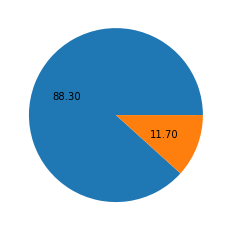

In [10]:
plt.pie(y.value_counts(),autopct='%.2f')
plt.show()

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,shuffle=True,random_state=20,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38429, 33), (6782, 33), (38429, 1), (6782, 1))

## 4.Model building

In [12]:
logistic_model = LogisticRegression()

### Model cross validation using k fold

In [47]:
X_train.shape,X_test.shape
38429/6,X_test.shape

(6404.833333333333, (6782, 33))

In [55]:
k_fold = KFold(n_splits=6,random_state=12,shuffle=True)

cv_scores = cross_val_score(estimator=logistic_model,X=X,y=y,scoring='accuracy',cv=k_fold)
print(cv_scores)
print(round(mean(cv_scores),4))
print(round(std(cv_scores),4))

[0.90273355 0.90179164 0.90126078 0.89741208 0.8986065  0.90033179]
0.9004
0.0018


#### Logistic regression algorithm can give a min accuracy of 90.04 with a std of 0.18

## 5.Model training

In [13]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

## 6.Model testing

In [14]:
y_pred = logistic_model.predict(X_test)


In [15]:
accuracy_score(y_test,y_pred)

0.901061633736361

In [16]:
confusion_matrix(y_test,y_pred)


array([[5847,  142],
       [ 529,  264]])

In [17]:
print('\n',classification_report(y_test,y_pred))


               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5989
           1       0.65      0.33      0.44       793

    accuracy                           0.90      6782
   macro avg       0.78      0.65      0.69      6782
weighted avg       0.89      0.90      0.89      6782



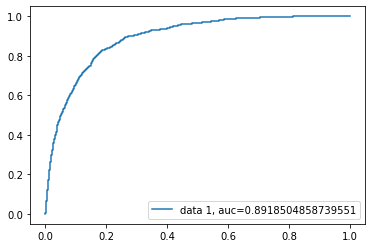

In [18]:
y_pred_prob = logistic_model.predict_proba(X_test)[::,1]
fpr,tpr,_ = roc_curve(y_test,y_pred_prob)
auc = roc_auc_score(y_test,y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Model deployment

In [106]:
dump(logistic_model,open('subcription_pred.pkl','wb'))